# Strojové učení - intro
Strojové učení (*Machine Learning* - ML) je skupina  algoritmů a technik, kde se na základě dostupných dat sestaví model daného systému a tento model se používá pro další předpověď budoucího chování systému, či pro rozhodování o akcích spojených s daným chováním systému.

**Poznámka:**
Různé zdroje podávají různé definice. Důležitá je ale závislost na datech.

Název strojové učení říká, že dané algoritmy umožní stroji **učit se**. Co to však znaméná, že se stroj učí? Někdy se uvažuje o strojovém učení jako o podmnožině umělé inteligence (*Artificial Inteligence* - AI), jindy ne. AI přepodkládá "uvědomnění", zatímco ML jsou spíše pasivní algoritmy.
Učením tedy rozumíme to, že stroj na základě dat mění svůj vnitřní stav tak, aby byl schopen reagovat na změny okolí. Na obrázku níže je zanesen vztah mezi AI a ML.

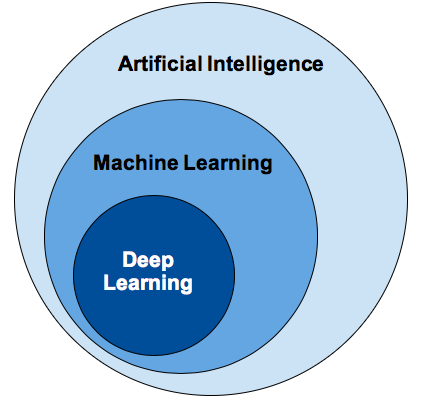

Zdroj obrázku <https://qph.cf2.quoracdn.net/main-qimg-3ba715eff1ae5c0964e9465d5db12d99>

Strojové učení úzce souvisí s dalšímy obory:


*   Optimalizace - celou řadu úloh ML lze popsat jako optimalizační problém
*   Statistika - algoritmy ML často vycházejí z aplikace statistických principů
*   Data mining - zaměřen na získávání informací z dat. Používá často některé z algoritmů ML, nicméně zde dané algoritmy používá člověk, aby získal informace z dat.




## Některé úlohy ML

Uveďme si zde nejčastější úlohy ML:


*   **Klasifikace** - rozdělení dat (datových bodů) do více tříd, např. na základě tělesných parametrů jedince rozhodnout zda je člověk obézní (třídy obézní, normální), či ne. Počet a druh tříd je předem známý.
*   **Regrese** - výpočet číselné hodnoty na základě vstupních parametrů, např. výpočet ceny nemovitosti na základě polohy, plochy bytu a dalších parametrů.
*   **Shlukování** (*clustering*) - rozdělení datových bodů do shluků, zde na rozdíl od klasifikace vůbec o daných třídách nevíme, zda existují. Cílem je právě ověřit, zda v datech jsou nějaké podobnosti.
*   Detekce anomálií - hledání výjimečných událostí v datech, příkladem může být detekce neoprávněných výběrů, či plateb kartou.
*   Redukce dimensionality - reálné úlohy obsahují obvykle velké množství dat, z nichž jen část je pro sestavení modelu podstatná, ostatní představují balast. Cílem je vybrat ze vstupní množiny dat pouze jistou podmnožinu tak, aby obsahovala potencionálně relevantní data.

Na obrázku níže je schematicky znázorněn rozdíl mezi nejčastějšími úlohami ML.




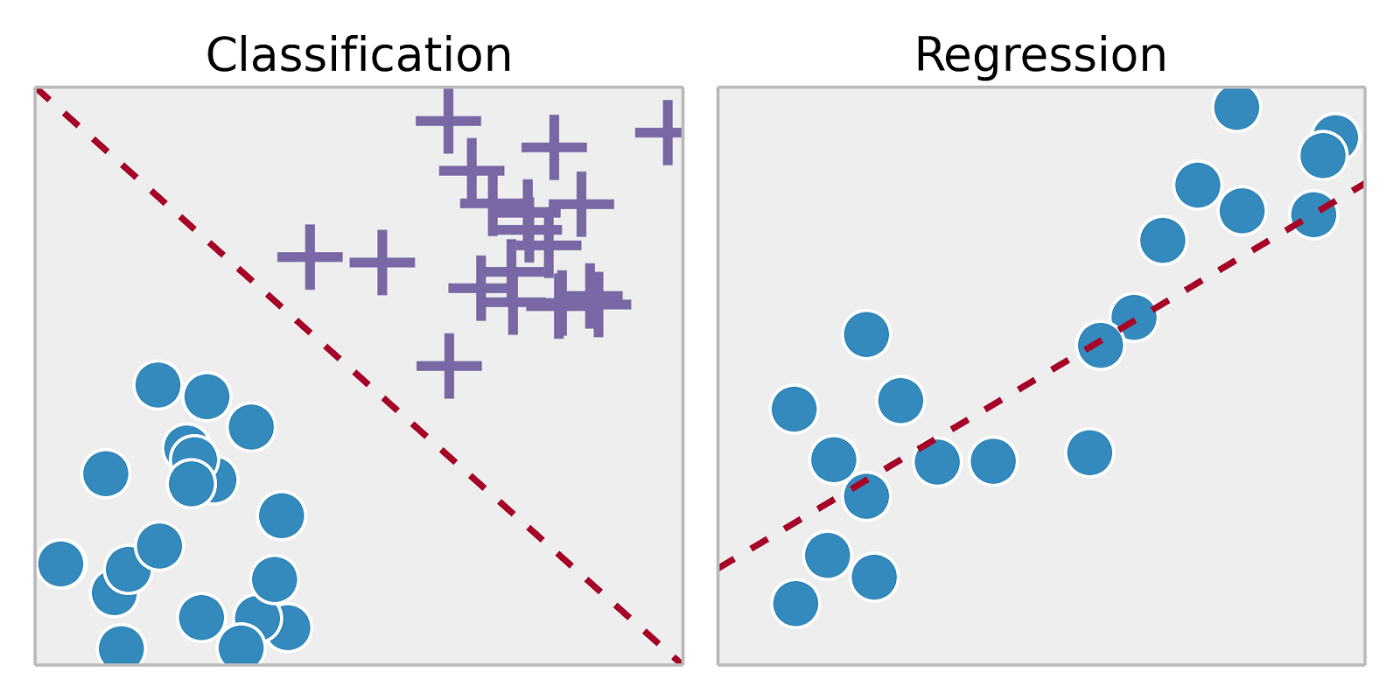

## Druhy učení

Předpokládejme, že máme k dispozici data, která využijeme k vytvoření modelu.
Na model se zde budeme dívat jako na nějakou krabičku (*black box*), která má svůj vnitřní stav, což je množina nějakých vnitřních parametrů.
Učením modelu pak rozumíme nastavení vnitřních parametrů modelu. V zásadě lze modely rozdělit do dvou základních skupin (vynecháváme  *reinforcement learning*), viz obrázek níže.

*   Učení s učitelem (*supervised learning*) - zde je součástí dat i výstup modelu. Měníme vnitřní parametry modelu tak, abychom dostali očekávaný výstup. Příkladem jsou rozhodovací stromy.
*   Učení bez učitele (*unsupervised learning*) - zde necháváme na modelu, aby našel nějakou strukturu v datech sám, informace např. do které třídy patří nejsou k dispozici. Příkladem je algoritmus **K-means** (zkuste si jej naprogramovat sami [zde](https://en.wikipedia.org/wiki/K-means_clustering)).


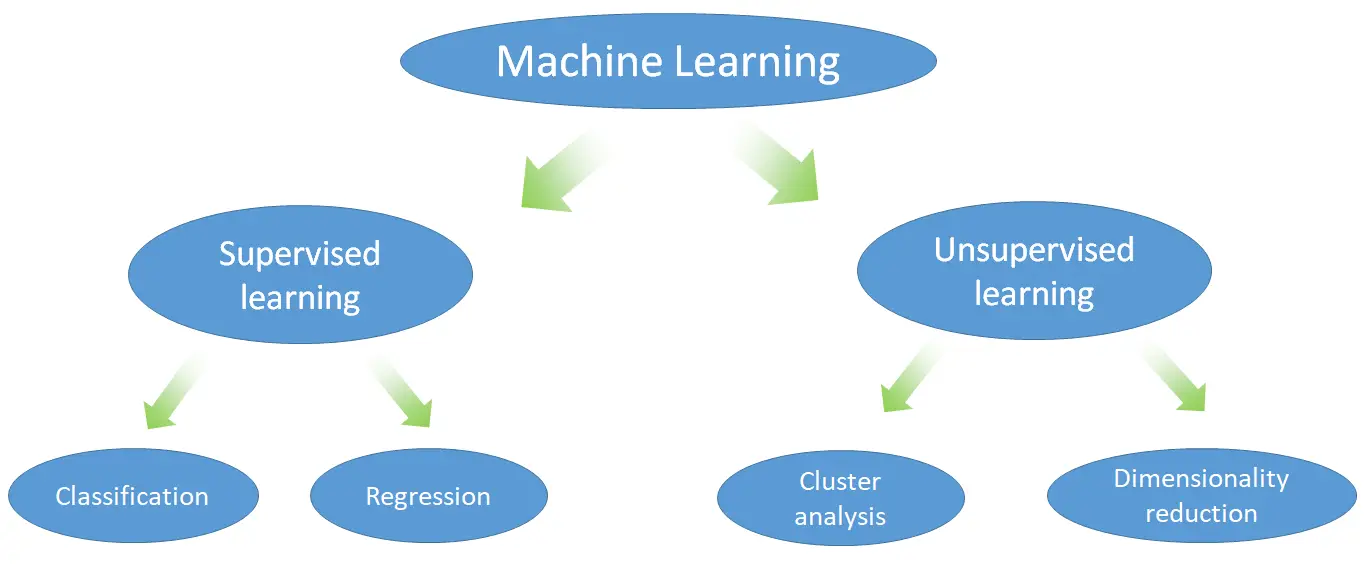

## Praktické ukázka a ilustrace úloh

Nejprve si vygenerujeme syntetická data. Budeme uvažovat jedince, jejichž váha a výška je dána gaussovským rozdělením:
\begin{equation*}
\rho(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}.
\end{equation*}

Každý jedinec je v podstatě bod v tzv. *příznakovém prostoru* (*feature space*). V našem případu jsou jednotlivé dimenze váha a výška. Používáme ještě body mass index (BMI), ale ten přímo pro rozhodování nepoužíváme.


In [9]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [10]:
#generování dat
import numpy as np
import pandas as pd
from numpy.random import randn
N = 1000 # počet datových bodů

# pomocí gausovského rozdělení nagenerujeme body v prostoru váha-výška
# generování váhy v kg
def generuj_vahu(vaha_prumer = 80, vaha_sigma = 12, kolik = 100):
  vaha = vaha_prumer+randn(kolik)*vaha_sigma
  vaha[vaha < vaha_prumer-4*vaha_sigma] = vaha_prumer-4*vaha_sigma # orezani nepravdepodobnych hodnot - podvaha
  vaha[vaha > vaha_prumer+4*vaha_sigma] = vaha_prumer+4*vaha_sigma # orezani nepravdepodobnych hodnot - nadvaha
  return vaha

#generování výšky v cm (pak si to do dataframu schvalen jeste prevedu na mm)
def generuj_vysku(vyska_prumer = 180, vyska_sigma = 15, kolik = 100):
  vyska = vyska_prumer+randn(kolik)*vyska_sigma
  vyska[vyska < vyska_prumer-4*vyska_sigma] = vyska_prumer-4*vyska_sigma
  vyska[vyska > vyska_prumer+4*vyska_sigma] = vyska_prumer+4*vyska_sigma
  return vyska

# spocteni body mass indexu BMI
vaha = generuj_vahu(kolik=N)
vyska = generuj_vysku(kolik=N)
bmi = vaha/(vyska/100)**2
svetr = np.random.choice(["modry", "zulty","fialovy"], size = N) # schvalne i preklep
# když BMI > 25 tak je jako problém
data = {"vyska": vyska*10 ,"vaha" : vaha, "svetr":svetr, "problem" :[ b>25 and s!="fialovy" for b,s in zip(bmi, svetr)]}
df = pd.DataFrame(data) #
# casto mají data poruchy, tak i je uměle vyrobíme
df.at[1,"vaha"] = None
df.at[3,"svetr"] = None
df.to_csv('data_lide.csv', index = False)
df_kopie=df.copy() # budu s tim jeste pracovat, ukazu jak to udelat rychle
df.head(10)



vyska        vaha    svetr  problem
0  1953.662612   66.519694    zulty    False
1  1719.147386         NaN    modry     True
2  1717.966446   81.904152    modry     True
3  1852.352999   62.616892     None    False
4  1729.747119   99.922554  fialovy    False
5  1754.344074   82.092365  fialovy    False
6  1710.799590   88.960594  fialovy    False
7  1980.442479   87.731843  fialovy    False
8  1753.504218   85.314676    modry     True
9  1865.518181  106.406549    zulty     True

## Obvyklé kroky

Chci sestrojit model, který ma základě atributů **váha**, **výška**, **svetr** rozhodne, zde je problém (ať už to znamené cokoliv). Učím se z dat.

1.   Jsou data v pořádku? Pokud ne oprav/uprav data.
2.   Volba algoritmu - souvisí s krokem předcházejícím (např. ošetření řetězcových hodnot, množství dat).
3.   Rozdělení dat na **testovací** a **trénovací** - na jedněch model čím a na druhých ověřuji, že se to opravdu naučilo. Protože modely ML mají často různé parametry, je výhodné rozdělit data na tři skupiny trénovací (učím na nich model), validační (ladím hyperparametry modelu) a testovací (ověřím úspěšnost modelu).





### Čištění a úprava dat
Nejprve data upravím/opravím.


*   Odstraním hodnoty které jsou v nepořádku - také bych je mohl dopočítat (trochu složitější)
*   Převedu si číselná data na stejné měřítko - některé algoritmy to vyžadují
*   Převedu si řetězcová data na čísla **pozor** abych tam nevnesl informaci, která tam není (*modra=0*, *fialova=1* modra < fialova ???). Zde použiji [One-hot encoding](https://en.wikipedia.org/wiki/One-hot)



In [11]:
df["svetr"].replace("zulty","zluty", inplace=True)# odstran preklep zluty
df_vycisteny = df.dropna() # odstraním vadná data - někdy je nutné/možné chybějící položky interpolovat, více viz kapitola zpracování datasetů
df_vycisteny.head(10)

vyska        vaha    svetr  problem
0   1953.662612   66.519694    zluty    False
2   1717.966446   81.904152    modry     True
4   1729.747119   99.922554  fialovy    False
5   1754.344074   82.092365  fialovy    False
6   1710.799590   88.960594  fialovy    False
7   1980.442479   87.731843  fialovy    False
8   1753.504218   85.314676    modry     True
9   1865.518181  106.406549    zluty     True
10  1623.332427   81.219192  fialovy    False
11  1757.404061  104.982458    modry     True

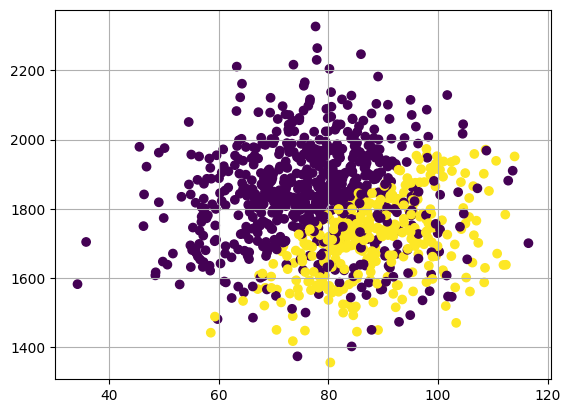

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x=df_vycisteny.vaha,y=df_vycisteny.vyska,  c=df_vycisteny.problem )
plt.grid()
plt.show()

In [13]:
# prevedeni sloupecku svetru na cisla pomoci one hot - delam from scratch
klice = set(df_vycisteny["svetr"]) # zjisti klice
print(klice)
pd.set_option('mode.chained_assignment', None) # potlac warningy
for klic in klice:
         df_vycisteny[klic]=(df_vycisteny["svetr"]==klic).astype(int) #- hazi warningy,
df_vycisteny.head(10)

{'fialovy', 'zluty', 'modry'}


vyska        vaha    svetr  problem  fialovy  zluty  modry
0   1953.662612   66.519694    zluty    False        0      1      0
2   1717.966446   81.904152    modry     True        0      0      1
4   1729.747119   99.922554  fialovy    False        1      0      0
5   1754.344074   82.092365  fialovy    False        1      0      0
6   1710.799590   88.960594  fialovy    False        1      0      0
7   1980.442479   87.731843  fialovy    False        1      0      0
8   1753.504218   85.314676    modry     True        0      0      1
9   1865.518181  106.406549    zluty     True        0      1      0
10  1623.332427   81.219192  fialovy    False        1      0      0
11  1757.404061  104.982458    modry     True        0      0      1

In [14]:
# normalizace dat - prevedu sloupecky vaha a vyska na interval <0,1>
vyska_norm=df_vycisteny.vyska-df_vycisteny.vyska.min()
vyska_norm=vyska_norm/vyska_norm.max()

vaha_norm=df_vycisteny.vaha-df_vycisteny.vaha.min()
vaha_norm=vaha_norm/vaha_norm.max()

df_vycisteny["vyska_norm"]=vyska_norm
df_vycisteny["vaha_norm"]=vaha_norm
df_vycisteny.head(10)


vyska        vaha    svetr  problem  fialovy  zluty  modry  \
0   1953.662612   66.519694    zluty    False        0      1      0   
2   1717.966446   81.904152    modry     True        0      0      1   
4   1729.747119   99.922554  fialovy    False        1      0      0   
5   1754.344074   82.092365  fialovy    False        1      0      0   
6   1710.799590   88.960594  fialovy    False        1      0      0   
7   1980.442479   87.731843  fialovy    False        1      0      0   
8   1753.504218   85.314676    modry     True        0      0      1   
9   1865.518181  106.406549    zluty     True        0      1      0   
10  1623.332427   81.219192  fialovy    False        1      0      0   
11  1757.404061  104.982458    modry     True        0      0      1   

    vyska_norm  vaha_norm  
0     0.615648   0.392556  
2     0.372807   0.579651  
4     0.384945   0.798779  
5     0.410288   0.581940  
6     0.365423   0.665467  
7     0.643239   0.650524  
8     0.409422   0.621128  
9     0.524832   0.877632  
10    0.275305   0.571321  
11    0.413440   0.860314

### Tvorba modelu
Pro lustraci použiji algoritmus K-NN.
#### Klasifikace pomocí metody KNN

Metoda [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (K-Nearest Neighbors) používá pro klasifikaci poměrně jednoduchého principu, kde při klasifikaci určíme *k* nejbližších sousedů a na výsledné určení třídy se použije ta třída, která v nejbližších sousedech převládá, více viz obrázek níže. Detaily si ukážeme v budoucnu. Nyní jen jednoduchý princip naivní implementace algoritmu.

Všimněte si, že data nijak neupravujeme a osy pak mají rozdílné měřítko. Vede to k tomu, že změna např. o 10 jednotek je v různých směrech různě významná.
Pro celou řadu algoritmů je nutné před jejich použitím data upravit tak, aby data měla stejné měřítko např. pomocí *standardizace*, *škálování*.

**Poznámka**
Lze použít i pro regresi - použiji např. nejbližší hodnotu, nebo vážený průměr k nejbližších sousedů.

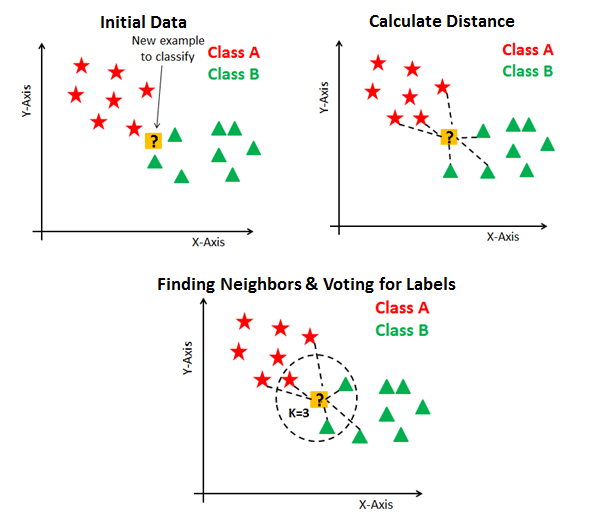

In [15]:
# udelam si jednoduchou funkci KNN - trivialni implementace.
def knn_klasifikuj(X,y,x, k=3):
  """
  :param X: vstupni matice prvku, kazdy radek je jeden zaznam - trenovaci data
  :param y: labely trenovacich dat
  :param x: prvek ktery chceme klasifikovat
  :param k: počet sousedů
  :return: cislo tridy
  """
  def vzdalenost(x,y):
    return np.sum((x-y)**2)

   # urceni tabulky vzdalenosti - ulozime vzdalenost od x a label pro kazdy prvek z X
  tabulka = np.array([(vzdalenost(x,radek), label) for radek, label in zip(X[:],y)])
  # nalezeni k-nejblizsich prvku. Podobny algoritmus jako pro selection sort.
  for krok in range(k):
    index = np.argmin(tabulka[krok:,0], axis=0)+krok
    tabulka[[krok, index]]  =  tabulka[[index, krok]]
  # urceni cetnosti labelu pro k nejblizsich sousedu - prvnich k v tabulce
  cetnosti = {}
  for label in tabulka[:k,1]:  # jed jen pres sloupecek labelu
    if label in cetnosti:
      cetnosti[label] += 1
    else:
      cetnosti[label] = 1
  # vrat klic prislusejici nejcetnejsi hodnote
  return int(sorted(cetnosti.items(), key = lambda kv: kv[1])[-1][0])

### Rozdělení dat na trénovací a testovací

In [16]:
# vyberu si jen sloupecky co potrebuji a pouziji jiz numpy pole (pandas->numpy array)
X = df_vycisteny[["modry",	"zluty",	"fialovy",	"vyska_norm",	"vaha_norm"]].values
y = df_vycisteny["problem"].values
# nahodne si data rozdel
index = np.array([ i for i in range(len(y))])
np.random.shuffle(index)
print(f"Nahodne zamichane indexy:{index[:10]}")
trenovaci_index = int(len(index)*0.80) # vezmeme 80 % pro nauceni modelu
X_tr=X[:trenovaci_index,:]# vem prislusne radky a vsechny sloupce
y_tr=y[:trenovaci_index]
X_test=X[trenovaci_index:,:]
y_test=y[trenovaci_index:]


Nahodne zamichane indexy:[849  64 494 418 477 909 602 782 190 627]


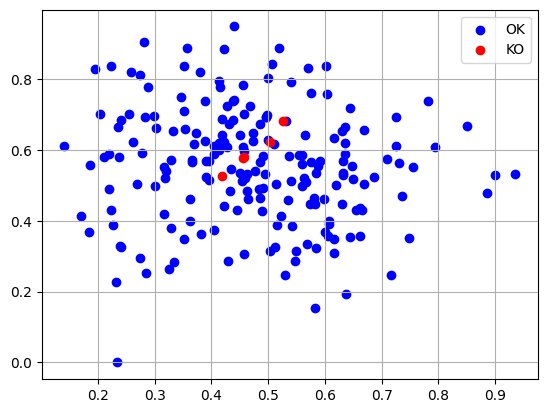

In [17]:
# Naučení modelu
y_hat = [knn_klasifikuj(X_tr,y_tr,prvek) for prvek in X_test]

plt.scatter(X_test[y_hat==y_test,3],X_test[y_hat==y_test,4], c="blue",label="OK")
plt.scatter(X_test[y_hat!=y_test,3],X_test[y_hat!=y_test,4], c="red", label="KO")
plt.grid()
plt.legend()

### Ohodnocení výsledku


Chceme-li měřit jak klasifikátor funguje, tak potřebujeme znát počty správně a špatně klasifikovaných případů. Toto nám elegantně vyjadřuje tzv.  [matice záměn](https://cs.wikipedia.org/wiki/Matice_z%C3%A1m%C4%9Bn)(*confusion matrix*). Zde upozorňujeme na to, že různé zdroje uvádějí různé tvary této matice, nejčastěji bývá diagonálně otočená, případně dochází k přehození sloupců.

<table>
  <tr>
   <th> </th>
    <th colspan="3">Realita</th>
  </tr>
  <tr>
  <th rowspan="4">Klasifikátor</th>
  </tr>
  <tr>
   <td> </td>
    <th>Pozitivní (1)</th>
    <th>Negativní (0)</th>
  </tr>
  <tr>
    <th>Pozitivní (1)</th>
    <td> TP </td>
    <td> FP </td>
  </tr>
  <tr>
    <th>Negativní (0)</th>
    <td> FN </td>
    <td> TN </td>
  </tr>
</table>


*   TP - počet pozitivních, které klasifikátor správně označil (*True Positive*)
*   TN - počet negativních, které klasifikátor správně označil (*True Negative*)
*   FP - reálně jde o negativní, ale klasifikátor je označil jako pozitivní (*False Positive*)
*   FN - reálně jde o pozitivní, ale klasifikátor je označil jako negativní (*False Negative*)

In [18]:
matice_zamen = np.array([[0, 0],[0,0]])
# urceni matice zamen - positive jsou ty s hodnotou True, negative s hodnotou False
for kl,re in zip(y_hat,y_test): # porovnej prvek po prvku
  if kl==re:# shoda
    if kl == 1: # trida 1-positive
      matice_zamen[0,0]+=1 # zvys TP
    else:
      matice_zamen[1,1]+=1 # zvys TF
  else:
    if kl == 1: #klasifikator rika 1, ale realita je 0
      matice_zamen[0,1]+=1 # zvys FP
    else:
      matice_zamen[1,0]+=1 # zvys FN

print(f"Matice zamen:\n {matice_zamen}")

Matice zamen:
 [[ 58   1]
 [  4 137]]


### Metriky

Uveďme si zde některé metriky pro zhodnocení klasifikace a jejich význam. Pomocí $P$ značíme celkový počet pozitivních (třída 1) a pomocí $N$ celkový počet negativních (třída 0).
Platí $P = TP + FN$, tedy $P$ je dáno součtem v prvním sloupci matice záměn. Obdobně $N = TN + FP$, tedy součet druhého sloupce matice záměn.


**Senzitivita** (*True Positive Rate*, *recall*)
udává poměr, kolik z celkového počtu pozitivních je pomocí klasifikátoru správně označeno jako pozitivní.
\begin{equation}
TPR = \frac{TP}{P}=\frac{TP}{TP+FN}.
\end{equation}

**Specificita** (*True Negative Rate*)
udává poměr, kolik z celkového počtu negativních je pomocí klasifikátoru správně označeno jako negativní
\begin{equation}
TNR = \frac{TN}{N} = \frac{TN}{TN+FP}.
\end{equation}

Uvědomme si jejich význam. Předpokládejme, že máme klasifikátor, který bude určovat, zda je někdo infikován (positivní test = třída 1, negativní test = třída 0).
Sensitivita nám říká, jaké procento ze skutečně pozitivních je tímto testem odhaleno, a specificita říká, jaké procento ze skutečně negativních tento test označí jako negativní.
V případě, že uděláme test takový, který vše označí jako pozitivní (FN =0, TN=0), tak je jeho senzitivita rovna 100%, ale bohužel specificita je nulová. Obráceně test, který všechny označí jako zdravé (negativní) (TP=0, FP=0) má sensitivitu nulovou a specificitu 100%.

Dále můžeme zavést tzv. **False Positive Rate**
\begin{equation}
FPR = \frac{FP}{N} = 1 - TNR,
\end{equation}
který představuje jaká část z negativních je klasifikátorem označena jako pozitivní.

Další metrikou je **přesnost** (*accuracy*), která udává celkový poměr počtu správně určených tříd:
\begin{equation}
ACC = \frac{TP+TN}{P+N}.
\end{equation}

Pomocí  **prediktivní hodnoty pozitivního testu** (*precision*, *Positive Predictive Value*) se určuje, jaký poměr z pozitivně označených hodnot tvoří správně určené (pozitivní) hodnoty, tj. jaká je pravděpodobnost, že test je skutečně pozitivní, když vyšel pozitivně:
\begin{equation}
PPV = \frac{TP}{TP+FP}.
\end{equation}


In [19]:
# můžete si sami spočítat dané metriky

## Ještě jednou a trochu lépe

* Použiji knihovnu [sklearn](https://scikit-learn.org/stable/) na CPU + dataframy [pandas](https://pandas.pydata.org/)

* Pokud chci používat např. časové řady, nebo různé statistické modely, tak [statsmodels](https://www.statsmodels.org/stable/index.html).

* Pokud mám dobrou grafiku (NVIDIA), tak projekt [rapids.ai](https://rapids.ai/) - ML algoritmy pro GPU + CUDF (dataframe na GPU).


In [20]:
# vyčištění dat a převod nominálních proměnných
df_kopie["svetr"].replace("zulty","zluty", inplace=True)# odstran preklep zluty
df_vycisteny = df_kopie.dropna() # odstraním vadná data - někdy je nutné/možné chybějící položky interpolovat
data_upraveno = pd.get_dummies(df_vycisteny["svetr"]) # zde pouzivam pandas pro one-hot
for column in df_vycisteny.columns:
  if column != "svetr":
    data_upraveno[column] = df_vycisteny[column]
data_upraveno
data_upraveno.head(10)

fialovy  modry  zluty        vyska        vaha  problem
0     False  False   True  1953.662612   66.519694    False
2     False   True  False  1717.966446   81.904152     True
4      True  False  False  1729.747119   99.922554    False
5      True  False  False  1754.344074   82.092365    False
6      True  False  False  1710.799590   88.960594    False
7      True  False  False  1980.442479   87.731843    False
8     False   True  False  1753.504218   85.314676     True
9     False  False   True  1865.518181  106.406549     True
10     True  False  False  1623.332427   81.219192    False
11    False   True  False  1757.404061  104.982458     True

In [21]:
from sklearn.model_selection import train_test_split # pro rozdeleni  dat

train_data, test_data = train_test_split(data_upraveno, test_size=0.2,random_state=42) # rozdelim si data na trenovaci a testovaci, random_state nastavím si seed generátoru náhodných čísel pro replikovatelnost
train_data.head()

fialovy  modry  zluty        vyska       vaha  problem
745    False   True  False  1617.916067  77.314737     True
288     True  False  False  1647.596539  49.800716    False
167    False  False   True  1868.561960  94.053215     True
961    False  False   True  1945.522288  67.174782    False
495    False  False   True  1692.145970  99.895552     True

In [22]:
# naškálování dat a sestavení dat, která půjdou do modelu
from sklearn.preprocessing import  MinMaxScaler # není vhodné pro data s outlayers
scaler=MinMaxScaler()
x_tr_sc = scaler.fit_transform(train_data[["vyska","vaha"]]) # najdi min/max na trénovacích datech a škáluj
x_test_sc=scaler.transform(test_data[["vyska","vaha"]])# zde jen škáluj testovací data, použije se min/max z trénovacích
# udelam si matici X_tr, kterou budu krmit model
X_tr = np.concatenate((x_tr_sc, train_data[["fialovy","modry","zluty"]]), axis=1) #
y_tr = train_data["problem"].values
# to same pro testovaci data
X_test = np.concatenate((x_test_sc, test_data[["fialovy","modry","zluty"]]), axis=1) #
y_test = test_data["problem"].values
print(X_tr)

[[0.25609269 0.52383811 0.         1.         0.        ]
 [0.28724363 0.18923175 1.         0.         0.        ]
 [0.51915641 0.72739981 0.         0.         1.        ]
 ...
 [0.3846886  0.56789831 0.         1.         0.        ]
 [0.62007175 0.55314136 0.         0.         1.        ]
 [0.65754006 0.66753793 0.         1.         0.        ]]


Použiji model [K-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) z *sklearn*.

In [23]:
# vlastni klasifikace, kdyz pouziji jiny model, tak se v podstate zmeni jen jeden radek
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)# defaultní počet sousedů je 5
model.fit(X_tr,y_tr)
y_hat=model.predict(X_test) # modu zjistit i "pravděpodobnosti" pomoci model.predict_proba()
score = model.score(X_test, y_test) # accuracy
print(f"Score:{score}")

Score:0.99


              precision    recall  f1-score   support

       False       0.99      0.99      0.99       130
        True       0.99      0.99      0.99        70

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Matice zamen pomoci sklearn:
129|1
1|69


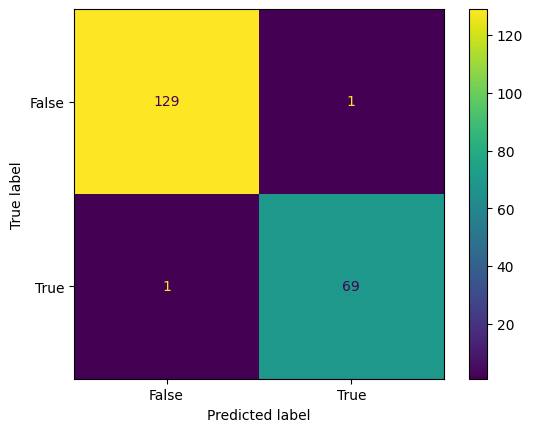

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
print(classification_report(y_test, y_hat, ))
cm = confusion_matrix(y_test,y_hat)
tn, fp, fn, tp = cm.ravel()
print(f"Matice zamen pomoci sklearn:") # pozor, aby to sedlo s obrazkem, tak jsem to otocil
print(f"{tn}|{fn}")
print(f"{fp}|{tp}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ["False","True"])# vykresleni
disp.plot()

#Stručný přehled modelů klasifikace a regrese

## Klasifikace

Cílem klasifikace je rozdělit prvky (datové body) do předem daných skupin.
Rozlišujeme klasifikaci *binární* (*binary*), kdy rozdělujeme data pouze do dvou tříd, nebo klasifikaci do více tříd (*multiclass*). Ve výše uvedených úlohách každý prvek náleží právě do jedné třídy. Další možností je to, že prvky mohou patřit do více tříd zároveň, v tomto případě se jedná o tzv. *multilabel* úlohu.

Při klasifikaci obvykle třídy číslujeme, máme tedy v případě binární klasifikace na výběr ze dvou možností , obvykle 0,1. V případě *n* tříd jsou to hodnoty $0,1, \ldots, n-1$. Klasifikátor nám vrací jednu z těchto hodnot.
V závislosti na algoritmu nám může též nabízet "pravděpodobnost" k příslušnosti do dané třídy. V případě binární klasifikace nám pro daný prvek stačí jedno číslo, neboť platí zákon vyloučeného třetího (prvek přísluší do třídy 0, nebo 1). V případě více tříd pak máme pravděpodobnost příslušnosti do více tříd.

V závislosti na typu úlohy je třeba volit algoritmy. Pro binární klasifikaci se např. používají:

*   Logistická regrese (*Logistic Regression*)
*   Algoritmus K-NN
*   Rozhodovací stromy a lesy(*Decision Trees*, DT)
*   Metoda podpůrných vektorů (*Support Vector Machine*, SVM)
*   Naive Bayes

Úlohy klasifikace do více tříd jsou řešitelné buď opakovanou binární klasifikací, nebo speciálními algoritmy, viz dále v tomto sheetu.

Další algoritmy např. [XGBOOST](https://xgboost.readthedocs.io/en/stable/)

### Klasifikace do více tříd
V daším uvažujme, že máme $n>2$ tříd, tedy nejedná se o binární klasifikaci. V tomto případě musíme rozlišovat, jaký klasifikátor používáme. Některé klasifikátory, např. *Naivní Bayesovský klasifikátor*, či *KNN* je možné jednoduše použít přímo. V případě algoritmů binární klasifikace, musíme sestrojit několik binárních klasifikátorů a na základě jejich rozhodnutí pak vybrat příslušnost k dané třídě.


V zásadě se používají [dvě strategie](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/):

*    *O-V-R* (One Versus Rest), či *O-V-A* (One Versus All) - v tomto případě dojde k sestrojení $n$ klasifikátorů a to tak, že každý dílčí klasifikátor určuje příslušnost do jedné z $n$ tříd. Výsledná třída je taková, která je předpověděna s největší jistotou. Musíme tedy být schopni měřit jistotu příslušnosti k dané třídě, viz např. *logistická regrese*. Metoda je implementována v knihovně [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier).
*   *O-V-O* (One Versus One) - zde dojde k sestrojení klasifikátorů pro každou dvojici tříd, tedy dojde k sestrojení k $\frac{n(n-1)}{2}$ dílčích klasifikátorů. Vybrána je ta třída, která je určena s největší jistotou. Na rozdíl od *O-V-R* je pomalejší, protože je nutné naučit větší počet klasifikátorů. Na druhou stranu se obvykle používá pro metody, které mohou mít problémy s velkými datasety, např. metoda *SVM*. Zde se potom pro každý dílčí klasifikátor používá jen část z celkového datasetu, viz [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html). Detailní popis algoritmu je možné nalézt [zde](https://www.sciencedirect.com/science/article/pii/S002002551631043X#sec0013).



## Logistická regrese


V lineární regresi hledáme model ve tvaru:
$y \approx X \cdot w + b$, kde $w$ jsou hledané váhy a $b$ je *bias*, jehož vliv je ten, že separační přímku (rovinu) posouvá, viz níže.

Někdy se používá zápis $y \approx X \cdot w $, zde se neuvažuje nulový bias, ale matice $X$ je rozšířena o sloupec tvořený jedničkami, tedy $X= (\overline{1}, X)$ a příslušný vektor vah $w$ má o dimenzi více než v předešlém případě.


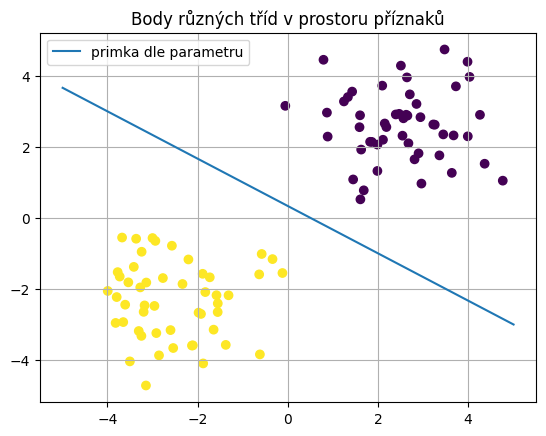

In [25]:
#@title  { run: "auto", vertical-output: true }
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# generování bodů
X, y = make_blobs(n_samples=100, centers=[(2.5,2.5),(-2.5,-2.5)], n_features=2, random_state=0)

min1,max1 = X[:,0].min(),X[:,0].max()
min2,max2 = X[:,1].min(),X[:,1].max()
w_1 = -0.2 #@param {type:"slider", min:-1, max:1, step:0.1}
w_2 = -0.3 #@param {type:"slider", min:-1, max:1, step:0.1}
bias = 0.4 #@param {type:"slider", min:-1, max:1, step:0.1}

x_1= np.arange(min1-1, max1+1) # osa x pro primky
x_2_mov = -w_1/w_2*x_1+(bias-1/2)/w_2  #primka dana slidery
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(x_1,x_2_mov, label='primka dle parametru')
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.legend()
plt.show()

### Logistická regrese pro klasifikaci

Pokud budeme chtít určit pravděpodobnost příslušnosti do dané třídy, potřebujeme transformovat hodnotu $\hat{y}$ na interval $<0,1>$.
K tomu je možné použít logistickou funkci, tzv. *sigmoidu*, $f(x) = \frac{1}{1+e^{-x}}$. Jejíž průběh je zanesen na obrázku níže.

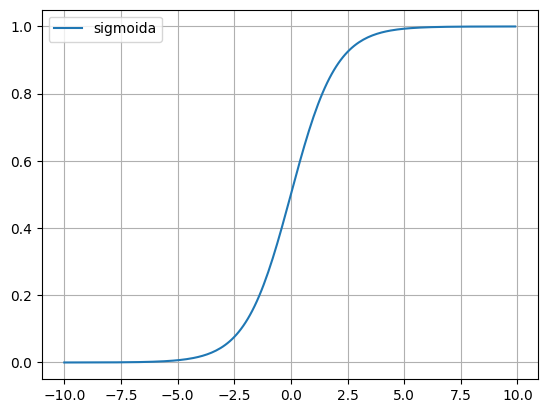

In [26]:
import numpy as np
import matplotlib.pyplot as plt
xsigmo = np.arange(-10, 10, 0.1)
ysigmo = 1/(1+np.exp(-xsigmo))
plt.plot(xsigmo, ysigmo, label = 'sigmoida')
plt.legend()
plt.grid()

Do sigmoidy dosadíme výsledek součinu $w \cdot x$ a dostáváme pravděpodobnost toho, že prvek patří do třídy s labelem 1:
\begin{equation}
\hat{y} = \frac{1}{1+e^{-w\cdot x}}.
\end{equation}

#### Logistická regrese pomocí MNČ
Budeme minimalizovat rozdíl mezi predikovanou pravděpodobností příslušnosti ke třídě a skutečnou hodnotou. Minimalizovaná funkce pro formulaci ve smyslu metody nejmenších čtverců je následující:
\begin{equation}
\min_{w} || y-\frac{1}{1+e^{-X\cdot w }}||^2.
\end{equation}
Poznamenejme, že zde používáme vektorizovanou formulaci, tedy $w$ je vektor, $X$
 matice příkladů a $||u||=\sqrt{\sum_i u_i^2}$ představuje normu daného vektoru.
Pro vlastní minimalizaci kriteriální (*ztrátové*) funkce (*loss function*) je použita knihovna scipy. Mohli bychom též postupovat tak, že bychom si naprogramovali i vlastní optimalizační algoritmus.

*Poznámka*
Často se provádí tzv. *regularizace*, kdy zároveň přidáváme do kriteriální funkce další člen, který má vliv na výslednou velikost vah $w$. Kriteriální funkce pak vypadá následovně:
\begin{equation}
\min_{w} || y-\frac{1}{1+e^{-w\cdot x}}||^2 + c ||w||^2,
\end{equation}
kde číslo $c$ je regularizační parametr.


In [27]:
import numpy.linalg as la # pro vypocet normy
import scipy.optimize as optimize # pro vypocet minima kriterialni funkce

class naivni_logisticka_regrese_binarni:
  def __init__(self):
    self._w = None
    self._X = None
    self._y = None

  def sigmoida(self, w, X):
    """
    Pomocna metoda pro vypocet sigmoidy
    """
    return 1.0/(1.0+np.exp(-X @ w))


  def kriterialni_funkce(self, w):
    """
    Minimalizovana funkce
    """
    return la.norm(self._y-self.sigmoida(w, self._X))


  def fit(self, X,y):
    """
    Nauceni modelu. Pro uceni je vyuzita knihovna scipy a nastroje pro
    optimalizaci v ni obsazene.
    """
    dimenze = X.shape[1]+1
    radky = X.shape[0]
    # priprav si data - pridani sloupce se jednickami, pro bias
    self._X = np.hstack((np.ones((radky,1)), X)) # pridej jednicky
    self._y = y
    # je pouzita iteracni metoda optimalizace, nahodne je zvolena nulta iterace
    w0 = np.random.randn(dimenze) # nahodny bod
    self._w=w0
    print(f"Pocatecni hodnota krit. fce {self.kriterialni_funkce(w0)}")
    print(f"Pocatecni hodnota vah w={w0}")
    res = optimize.minimize(self.kriterialni_funkce, w0, method='BFGS', tol=1e-5)
    self._w = res.x
    print(f"Konecna hodnota krit. fce {self.kriterialni_funkce(self._w)}")
    print(f"Konecna hodnota vah w={self._w}")
    return self._w

  def predict_proba(self, X):
    """
    Vypocet pravdepodobnosti prislusnosti ke tride
    """
    return self.sigmoida(self._w, np.hstack((np.ones((X.shape[0],1)), X)))

  def predict(self, X, hranice=0.5):
    """
    Predikce konkretni tridy na zaklade pravdepodobnosti.
    """
    pravdepodobnost = self.predict_proba( X)
    return  1* (pravdepodobnost > hranice)



In [28]:
from sklearn.metrics import classification_report
#pouziti navrzene tridy
model = naivni_logisticka_regrese_binarni()
model.fit(X,y) # nauceni modelu

# Pouziti pro predikci
y_hat = model.predict(X)
print(classification_report(y, y_hat, ))


Pocatecni hodnota krit. fce 7.350331892275177
Pocatecni hodnota vah w=[ 0.32615047  0.81391158 -0.39266641]
Konecna hodnota krit. fce 3.485352642849679e-06
Konecna hodnota vah w=[ 20.42046498 -14.47891442 -18.57517254]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Použití modelu ze scikitlearn

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # zde je možné rovnou předpsat regularizaci
model.fit(X,y)
y_hat = model.predict(X)
# Pouziti pro predikci
y_hat = model.predict(X)
print(classification_report(y, y_hat, ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Rozhodovací stromy

Rozhodovací stromy (Decision tree) jsou algoritmem strojového učení s učitelem vhodným jak pro klasifikaci, tak regresi. Jejich konstrukce spočívá ve vytvoření jednoduchých pravidel, která nám rozdělují příznakový prostor na menší a menší oblasti, tak, že cílová proměnná, daná třída pro klasifikaci, či hodnota predikované veličiny, je v dané oblasti téměř konstantní.

Na obrázku, níže vlevo, je ukázka rozhodovacího stromu pro klasifikaci, např. zda si daný zákazník koupí počítač. Vidíme, že hloubka stromu je dva. Strom není binární, neboť má v první úrovni více větvení. Na druhém obrázku vpravo je ukázána aproximace funkce pomocí rozhodovacího stromu. Tedy je použit rozhodovací strom pro úlohu regrese. Hloubka stromu je opět dva. Všimněte si, že počet hodnot, pomocí kterých je aproximována veličina na ose $y$, je čtyři, což odpovídá binárnímu stromu o hloubce dva.

Klasifikace | Regrese
- | -
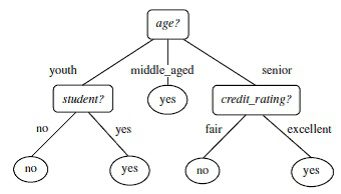|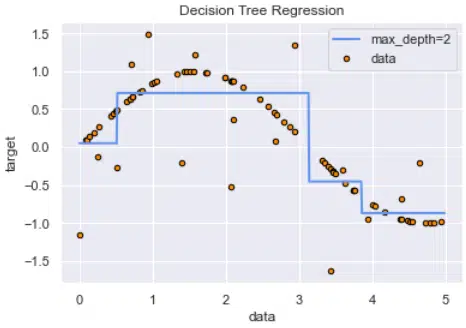
zdroj: https://www.kdnuggets.com/2016/10/decision-trees-concise-technical-overview.html | zdroj: https://www.jcchouinard.com/regression-in-machine-learning/#dt_reg

Jednou ze základních vlastností stromů je, že jsou bezparametrické, vyjma požadované hloubky stromu. Mezi výhody stromů patří to, že mají malé nároky na různé úpravy dat, jako je škálování, či že umí pracovat jak s kategorickými, tak i s numerickými daty. Jsou snadno interpretovatelné,neboť víme na základě jakého pravidla (cesta ve stromu a hodnoty příznaků) došlo k danému rozhodnutí.

Na druhou stranu mají i nevýhody. Příkladem je někdy špatná schopnost generalizace při konstrukci stromů velkých hloubek. Generalizací rozumíme to, že na tréninkových datech algoritmus funguje dobře, ale na testovacích datech (neznámých) má výrazně horší úspěšnost. Tedy model se chová spíše jako paměť a nedošlo ke správnému naučení.
 Díky citlivosti na nevyvážená data, tj. když je výrazný nepoměr mezi počtem zástupců tříd, bývá strom *biasovaný* (ovlivněný) četnějšími třídami. Dále mohou stromy být citlivé na změnu dat, tj. malá změna v trénovacích datech vede ke konstrukci velmi odlišného stromu.

Pro konstrukci stromů je používána celá řada algoritmů:


*   Iterative Dichotomiser 3 - [ID3](https://en.wikipedia.org/wiki/ID3_algorithm)
*   [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm)
*   Classification And Regression Tree - [CART](https://www.researchgate.net/profile/Dan-Steinberg/publication/265031802_Chapter_10_CART_Classification_and_Regression_Trees/links/567dcf8408ae051f9ae493fe/Chapter-10-CART-Classification-and-Regression-Trees.pdf)

V daším se seznámíme jen s principem rozhodovacích stromů. Pro praktické použití budeme používat knihovnu [sklearn](https://scikit-learn.org/stable/modules/tree.html)


## Principy konstrukce rozhodovacího stromu


V dalším budeme postupovat dle [Sebastian Raschka](https://sebastianraschka.com/blog/2021/ml-course.html#part-3-tree-based-methods) a jeho knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition).

### Impurita
Princip konstrukce rozhodovacích stromů spočívá v tom, že postupně přidáváme do stromu jednotlivá dělící kritéria (uzly), tak, aby nově vzniklé množiny byly co nejvíce stejnorodé, tedy aby v nich byla maximálně zastoupena jedna z $c$ tříd. Pokud chceme charakterizovat to, zda prvky nějaké množiny $m$ jsou stejnorodé, musíme určovat její *impurity* (ne/čistotu).
 K tomu lze použít následující tři metriky.

**Entropie**:
\begin{equation}
I_H(m) = -\sum_{i=1}^c p(i|m)\log_2(p(i|m)),
\end{equation}
kde $p(i|m)$ představuje pravděpodobnost (reálně četnost) třídy $i$ v množině $m$. Znaménko mínus je zde proto, že pravděpodobnosti $p(i|m)\le1$ a tedy daný logaritmus vychází záporný. Dále, pro případ  $p(i|m)=0$, tedy pro případ, že nějaká třída není v $m$ zastoupena vůbec, definujeme $p(i|m)\log_2(p(i|m))=0$. V případě dvou a více tříd je entropie maximální,tehdy, když jsou třídy v $m$ zastoupeny rovnoměrně. Naopak, pokud jsou v $m$ jen prvky jedné třídy, pak je entropie nulová. V ukázce níže je navíc přidáno normování, protože maximální $I_H(m)=1$.

**Gini impurity**
\begin{equation}
I_G(m) = -\sum_{i=1}^c p(i|m)(1-p(i|m))=1-\sum_{i=1}^c p(i|m)^2.
\end{equation}
Opět jako v případě entropie, je maximální, když jsou zástupci jednotlivých tříd zastoupeny v $m$ rovnoměrně, a nulová, pokud je $m$ stejnorodá. Její průběh je obdobný průběhu entropie, viz ukázka níže.

Další příkladem můžem být impurita založená na **chybě klasifikace**:
\begin{equation}
I_E(m)=1-\max_{i=1,\ldots,c}(p(i|m)).
\end{equation}
Opět je jasně vidět, že v případě, že množina $m$ je stejnorodá, tak $I_E(m)=0$. Takto definovaná impurita nemá v maximu derivaci a z toho důvodu může způsobovat problém při případné numerické optimalizaci.


/tmp/ipykernel_4339/1901220698.py:6: RuntimeWarning: divide by zero encountered in log2
  Ih = -(p*np.log2(p) + (1-p)*np.log2(1-p))
/tmp/ipykernel_4339/1901220698.py:6: RuntimeWarning: invalid value encountered in multiply
  Ih = -(p*np.log2(p) + (1-p)*np.log2(1-p))


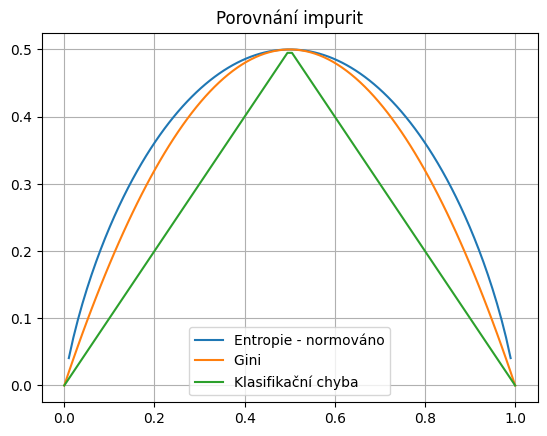

In [30]:
# prubeh jednotlivych impurit pro dve tridy
import matplotlib.pyplot as plt
import numpy as np

p=np.linspace(0,1,100) # generuj pravdepodobnosti 0 az 1
Ih = -(p*np.log2(p) + (1-p)*np.log2(1-p))
Ig = 1 - (p**2+(1-p)**2)
Ie = 1-np.maximum(p,1-p)
plt.plot(p, Ih/2, label = "Entropie - normováno")
plt.plot(p, Ig, label = "Gini ")
plt.plot(p, Ie, label = "Klasifikační chyba")
plt.title("Porovnání impurit")
plt.grid()
plt.legend()

### Výběr kritéria pro dělení

V dalším uvažujme konstrukci binárního klasifikačního stromu, tedy každý rodičovský uzel $D_p$ stromu má nejvýše dva potomky $D_{p,L}$ (levý) a $D_{p,R}$ (pravý). Při konstrukci stromu přídáváme podmínku typu zda příznak $f$ má hodnotu $\nu_f$. Dochází tak postupně k procházení všech příznaků a pro každý příznak se testují jeho všechny možné hodnoty $\nu_f$. Vybere se takové dělení, které maximalizuje tzv. **informační zisk**:
\begin{equation}
IG(D_p,f,\nu_f) = I(D_p) - \frac{\#D_{p,L}}{\#D_p}I(D_{p,L})-\frac{\#D_{p,R}}{\#D_p}I(D_{p,R}),
\end{equation}
kde pomocí $I(.)$ je značena impurita příslušného potomka (L,R). Členy $\frac{\#D_{p,L}}{\#D_p}$ a $\frac{\#D_{p,R}}{\#D_p}$ představují váhy pro impuritu, neboť $\#D_{p,L}$, resp. $\#D_{p,R}$ značí počet prvků v daných potomcích a $\#D_p$ značí počet prvků v rodiči. Tedy postupně dochází přidáváním podmínek ke snižování impurity. Algoritmus preferuje co nejrychlejší snížení impurity.

**Poznámka**
Výše uvedený postup zhruba odpovídá algoritmu ID3, který je navržen pro diskrétní hodnoty jednotlivých atributů. V případě spojitých hodnot daného atributu je možné buď hodnoty diskretizovat, nebo použít algoritmus *CART*.

### Prořezávání stromů - prunig

Rozhodovací stromy mají jednu nevýhodu a to, že mají tendenci se přeučovat. Pokud nebudeme omezovat délku stromu, tak se algoritmus může chovat jako pamět na tréninková data. Mohou se vytvořit velmi hluboké stromy, kde výsledné [listy](https://cs.wikipedia.org/wiki/List_(graf)) obsahují jen jednoprvkové množiny. Toto obvykle vede k tomu, že na tréninkových datech algoritmus klasifikuje úspěšně, ale na testovacích výrazně méně, více viz [zde](http://www.cs.cmu.edu/~awm/15781/slides/DTreesAndOverfitting-9-13-05.pdf).

V zásadě jsou dvě možnosti. Buď se použije tzv. *pre-pruning*, tedy je nastavena maximální hloubka stromu a není dovolen vytvořit strom větší hloubky než je dáno. Druhou možností je použití tzv. *post-pruningu*, kdy je nejprve vytvořen strom a pak dochází k postupnému odstraňování některých větví (pravidel).

### Praktická ukázka - klasifikace MNIST

Data set [MNIST](https://en.wikipedia.org/wiki/MNIST_database) je soubor ručně psaných číslic. Cílem je kategorizovat číslice do příslušnách kategorií. Obrázky jsou 28x28 pixelů. Pro naši úlohu použijeme zmenšený dataset v knihovně *sklearn* na 8x8 pixelů.
Vynecháme normování/standardizaci datasetu a použijeme defaultní nastavení algoritmu.

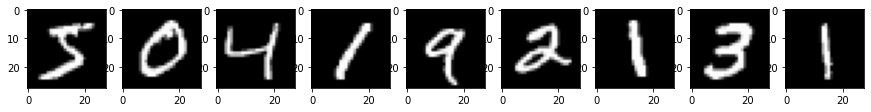

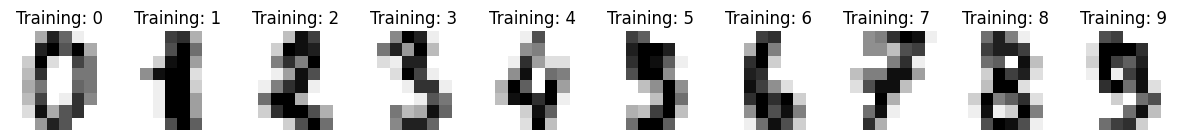

In [31]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, tree
from sklearn.model_selection import train_test_split
# nacteni datasetu
digits = datasets.load_digits()

# prevzato z sklearn - vizualizace cislic
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 4))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
# priprava datasetu - prevod obrazku 8*8 na vektory
samples_count = len(digits.images)
data = digits.images.reshape((samples_count, -1))
# rozdeleni na jednotlive mnoziny, z duvodu reprodukovatelnosti predepiseme nahodny stav - random_state a pri kazdem spusteni to bude stejne
X_tr, X_test, y_tr, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)
# má vliv nějaký standardizace

In [32]:
# nauceni stromu a provedeni klasifikace na trenovacich datech
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tr, y_tr)
predicted = clf.predict(X_tr)
print(f"Report klasifikace na trenovacich datech {clf}:\n{metrics.classification_report(y_tr, predicted)}")

Report klasifikace na trenovacich datech DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [33]:
#provedení klasifikace na testovacích datech - je to horší
predicted = clf.predict(X_test)
print(f"Report klasifikace na testovacich datech {clf}:\n{metrics.classification_report(y_test, predicted)}")

Report klasifikace na testovacich datech DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.88      0.75      0.81        28
           2       0.85      0.85      0.85        33
           3       0.70      0.88      0.78        34
           4       0.80      0.89      0.85        46
           5       0.93      0.89      0.91        47
           6       0.89      0.94      0.92        35
           7       0.88      0.88      0.88        34
           8       0.83      0.63      0.72        30
           9       0.82      0.82      0.82        40

    accuracy                           0.85       360
   macro avg       0.86      0.84      0.85       360
weighted avg       0.86      0.85      0.85       360



Porovnáním výsledků je vidět, že na testovacích datech je klasifikátor horší.
#### Úkoly pro samostanou činnost


1.   Ověřte vliv nastavení maximální hloubky stromu
2.   Ověřte vliv použití různých kritérií $I_H$, $I_G$, viz dokumentace [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
3.   Ověřte vliv normalizace a standardizace na datasetu na výsledek.



## Použití regresních stromů

Na ukázce níže, je použit [regresní strom](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) pro aproximaci periodické funkce. Strom je naučen na intervalu $<0, 2\pi>$, kde dává i uspokojivé výsledky. Při posunu na interval $<2\pi, 4\pi>$ je však vidět, že aproximuje špatně.

Text(0.5, 1.0, 'Regrese na intervalu <2 pi,4 pi>')

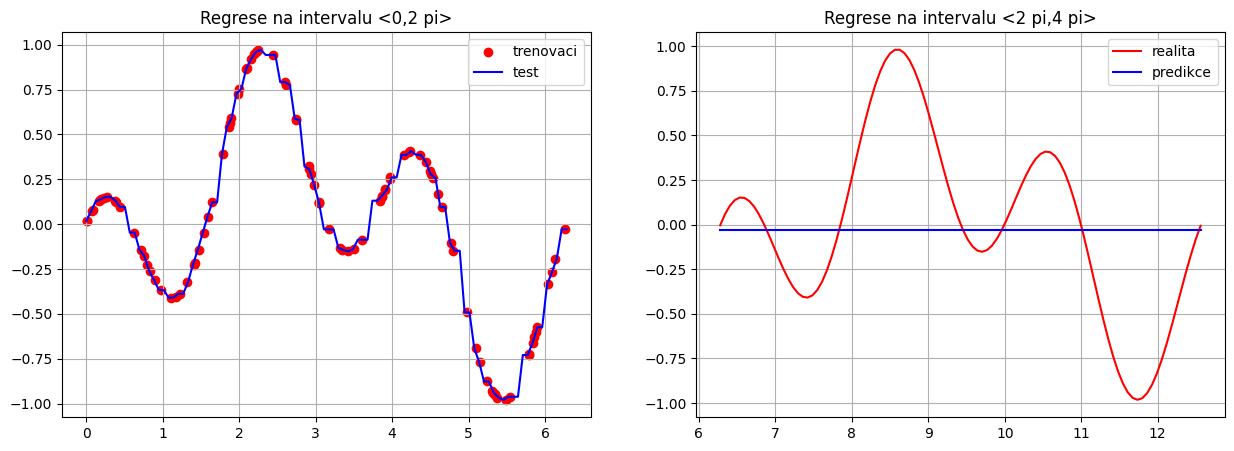

In [34]:
# Pouziti regresnich stromu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
# definice "nezname" funkce
def f(x):
  return np.sin(2*x)*np.cos(x+1)

#priprava dat
X_tr = 6.28*np.random.rand(100,1) #generuj na interval <0,2pi> trenovaci data
y_tr=f(X_tr)

X_test = np.linspace(0,6.28,100).reshape(100,1)
X_test_posun = np.linspace(6.28,2*6.28,100).reshape(100,1)

# nauceni stromu a predikce
reg = DecisionTreeRegressor(criterion="absolute_error") # pozor jina kriteria
reg.fit(X_tr,y_tr)
y_test = reg.predict(X_test)
y_test_posun = reg.predict(X_test_posun)

# vykresleni vysledku
plt.rcParams['figure.figsize'] = [15, 5]
figure, axis = plt.subplots(1, 2)

axis[0].scatter(X_tr,y_tr, label = "trenovaci", color='r')
axis[0].plot(X_test, y_test,label = "test", color = 'b')
axis[0].grid()
axis[0].legend()
axis[0].set_title("Regrese na intervalu <0,2 pi>")

axis[1].plot(X_test_posun,f(X_test_posun), label = "realita", color='r')
axis[1].plot(X_test_posun, y_test_posun,label = "predikce", color = 'b')
axis[1].grid()
axis[1].legend()
axis[1].set_title("Regrese na intervalu <2 pi,4 pi>")

#### Úkoly pro samostatnou činnost

Použijte regresní strom pro predikci v [Boston dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Vaším cílem je udělat predikci cen nemovitostí, tj. posledního čtrnáctého sloupečku pomocí ostatních.

**Srovnejte v MSE, MAE** s použitím modelu založeného na metodě nejmenších čtverců (naprogramujte sami, nebo použijte [OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) ) a [knn regresoru](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Nezapomeňte provést úpravu a normováni datasetu.

## Seskupování stromů a lesy

Principy zde diskutované je možné použít i pro jiné algoritmy než jsou stromy. Základní myšlenka je *více hlav víc ví*, tedy budeme používat více stromů (hlav). Díky seskupování více klasifikátorů nám nevadí situace, kdy jeden klasifikátor nemusí být zas tak úspěšný, ale jako celek je seskupení klasifikátorů poměrně úspěšné a navíc redukuje přeučování. Poznamenejme, že se nemusí jednat jen o úlohu klasifikace, podobný přístup je možný použít i pro úlohu regrese.

V zásadě rozlišujeme dva algoritmy **bagging** a **boosting**. Oba dva přístupy se často používají, viz např. [sklearn](https://scikit-learn.org/stable/modules/ensemble.html).

### Bagging - Bootstrap Aggregating

V případě baggingu je celý dataset $D$ náhodně rozdělen na menší datasety $D_i$ tak, že $D=\cup_{i}D_i$ a zároveň pro některé dvojice platí $D_i \cap D_j \neq \emptyset$. Na každém z nich je naučen jeden dílčí klasifikátor. Na rozdíl od *boostingu* (viz dále) zde není provázanost jednotlivých klasifikátorů, tedy v principu se mohou učit paralelně. Výsledná klasifikace je dána většinovým hlasováním jednotlivých klasifikátorů. Více viz [zde](https://en.wikipedia.org/wiki/Bootstrap_aggregating). Příkladem jsou tzv. [náhodné lesy](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)(*RandomForest*).

### Boosting
V případě *boostování* spočívá hlavní myšlenka v tom, že se opět náhodně rozdělí původní dataset $D$ na dílčí datasety $D_i$, nyní ovšem k dělení dochází postupně. Nejprve je zkonstruován $D_1$ a je na něm naučen první klasifikátor. Část z příkladů v $D$, které první klasifikátor špatně klasifikuje, je přidána do $D_2$ a je zvýšena jejich důležitost (váhy). Na $D_2$ je naučen druhý klasifikátor. Toto celé se opakuje s předepsaným počtem opakování. Při učení jsou použity tzv. *slabé klasifikátory*, což si můžeme představit jako stromy s malou hloubkou. Síla algoritmu spočívá v tom, že každý další klasifikátor se učí na datech, kde předchozí selhal. O výsledku se rozhoduje váženým součtem dílčích klasifikátorů, kde váha je dána úspěšností klasifikátoru při učení.
Příkladem těchto algoritmů je [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost), nebo [Gradient Tree Boosting](https://en.wikipedia.org/wiki/Gradient_boosting). Tyto a další jsou implementovány v knihovně [sklearn](https://scikit-learn.org/stable/modules/ensemble.html).

Na ukázce níže je použití algoritmu *RandomForest* pro úlohu MNIST. Je zde vidět, že oproti použití samotného rozhodovacího stromu došlo ke zlepšení ve sledovaných metrikách.

#### Úkol pro samostatnou činnost
Na úloze MNIST porovnejte algoritmus *AdaBoost* s *RandomForest*.



In [35]:
# klasifikace MNIST pomoci RandomForest
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # pro nahodny les

# nacteni datasetu
digits = datasets.load_digits()
# priprava datasetu - prevod obrazku 8*8 na vektory
samples_count = len(digits.images)
data = digits.images.reshape((samples_count, -1))
# rozdeleni na jednotlive mnoziny - trenovaci a testovaci data
X_tr, X_test, y_tr, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)
# vytvoreni a nauceni klasifikatoru
forest = RandomForestClassifier(n_estimators=20)
forest = forest.fit(X_tr, y_tr)
# predikce a jeji zhodnoceni
predicted = forest.predict(X_test)
print(f"Report klasifikace na testovacich datech {forest}:\n{metrics.classification_report(y_test, predicted)}")

Report klasifikace na testovacich datech RandomForestClassifier(n_estimators=20):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.90      1.00      0.95        28
           2       1.00      1.00      1.00        33
           3       1.00      0.91      0.95        34
           4       0.94      1.00      0.97        46
           5       0.92      0.98      0.95        47
           6       1.00      0.97      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.93      0.95        30
           9       0.92      0.90      0.91        40

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



##Metoda podpůrných vektorů - SVM
Support vector machines (SVM) je jednou z klasických metod strojového učení. Dále rozšiřuje myšlenku lineárních klasifikátorů o pojem hranice. Je použitelná a účinná i pro úlohy, které nejsou lineárně separabilní. V porovnání s neuronovými sítěmi je i méně výpočetně náročná. Ukážeme si základní myšlenky na kterých stojí.

### Hard margin formulace
Nejprve předpokládejme, že máme data, která jsou lineárně separabilní. Tedy opět $x_i$ jsou datové body a $y_i$ jsou příslušející labely, $y_i=\pm1$. Na obrázku níže, je zachycena situace, kdy se snažíme separovat jednotlivé body rovinou $w^T\cdot x + b=0$, podobně jako v případě lineárních klasifikátorů. Rozdíl je ovšem ten, že nyní se snažíme maximálně rozšířit pás, ve kterém neleží žádné body v příznakovém prostoru. **Rozmyslete si**, jaký to má vliv na počet takovýchto rovin v porovnání s perceptronem. Body, které leží na hranicích tohoto pásu, nazýváme *podpůrné vektory*, odtud název metody. O hard margin (*pevném okraji*) mluvíme proto, že nepřipouštíme situaci, že by body byly na opačné straně hraničních přímek.


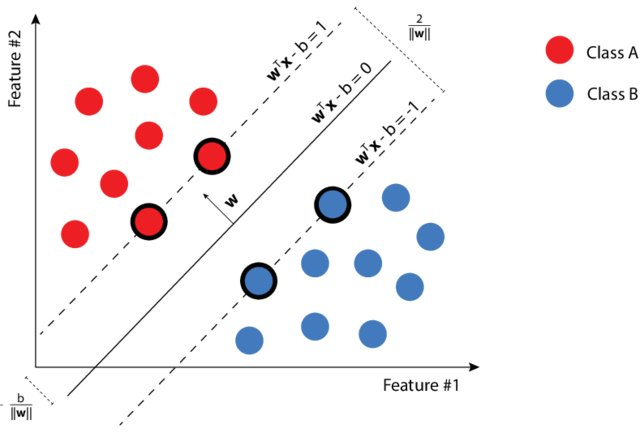

###Matematická formulace

Šířka pásu $d$ je dána vahami $w$ a to tak, že $d=\frac{2}{||w||}$, viz [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf). Protože chceme mít pás maximální šířky, můžeme úlohu formulovat tak, že **minimalizujeme** funkci $\frac{||w||^2}{2}$, tedy používáme místo maximalizace minimalizaci převrácené hodnoty. Druhá mocnina v čitateli je zde ze stejného důvodu jako u MNČ, tedy zbavíme se odmocniny v definici normy. Je nutné si uvědomit, že navíc chceme, aby body ležely nad, resp. pod rovinou, tedy aby pro $y_i=+1$ platilo $w^T\cdot x_i +b\ge+1$ a pro $y_i=-1$ platilo, že $w^T\cdot x_i +b\le-1$. Obě tyto podmínky lze zapsat ve tvaru $y_i(w^T\cdot x_i +b)-1\ge0$.

Toto vede na tzv. úlohu [kvadratického programování](https://cs.wikipedia.org/wiki/Kvadratick%C3%A9_programov%C3%A1n%C3%AD):
\begin{align}
&\min \frac{||w||^2}{2} \\
\mbox{za podmínek}\\
&y_i(w^T\cdot x_i +b)-1\ge0,
\end{align}
kde neznámé jsou $w$ a $b$. Pro praktické použití se spíše využívá duální formulace této úlohy, více viz [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf), což je maximalizační úloha pro duální proměnné $\alpha_i$.

\begin{align}
&\max \sum_i\alpha_i- \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i  x_i \cdot x_j y_j \\
\mbox{za podmínek}\\
&\sum_i \alpha_iy_i=0\\
&\alpha_i\ge0.\\
\end{align}

Z duálních proměnných je možné dopočítat $w$ a $b$, viz [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf), například  váhy spočteme dle vztahu $w=\sum_i\alpha_i y_i x_i$ .

Máme-li určené váhy $w$ a $b$, pak klasifikaci provádíme podobně jako u lineárního klasifikátoru:
\begin{equation}
\hat{y}=\text{sign}(w^T \cdot x + b),
\end{equation}
nebo v případě duální formulace máme vztah:
\begin{equation}
\hat{y}=\text{sign}(\sum_i\alpha_i y_i x_i \cdot x + b).
\end{equation}

**Poznámka I**

Pokud si kladete otázku, proč se volí rovnoběžné roviny na hladině $\pm 1$, tak je to v podstatě jedno na jaké hladině se volí. Vektor $w$ má vliv na sklon roviny a jeho vynásobení libovolnou nenulovou konstantou na naklonění roviny nemá vliv. Proto se bere hladina $\pm 1$.

**Poznámka II**

Úlohy kvadratického programování je možné popsat pomocí matic, které se vyskytují jak v minimalizované funkci, tak v soustavě omezujících podmínek. Například účelovou funkci $\frac{||w||^2}{2}$ lze zapsat ve tvaru $\frac{1}{2}w^T I w$, kde $I$ je jednotková matice.


**Poznámka III**

Duální formulace je výhodná jak z výpočetního hlediska, tak proto, že umožní udělat tzv. *jádrový trik*, viz dále, což je efektivní způsob nelineární transformace úlohy do vyšší dimenze proto, aby šla data lépe separovat.




#### Naivní implementace - samostatná činnost
Seznamte se s knihovnou [CVXOPT](https://cvxopt.org/), hlavně se zadáváním úlohy [kvadratického programování](https://cvxopt.org/userguide/coneprog.html#quadratic-programming).

Naivní implementace primární formulace této metody *from scratch* pomocí řešiče kvadratického programování [CVXOPT](https://cvxopt.org/) je uvedena níže. Porovnejte s matematickým modelem. Konkrétně si rozmyslete, jak je úloha formulována v maticovém zápisu. Většina kódu pak spočívá jen ve vygenerování příslušných matic popisujících úlohu kvadratického programování, metoda *create_model_SVM_primary()* a jejich předání řešiči.

In [36]:
!pip install cvxopt # instalace knihovny pokuď neexistuje

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 26.3 MB/s eta 0:00:00m eta 0:00:010:00:01


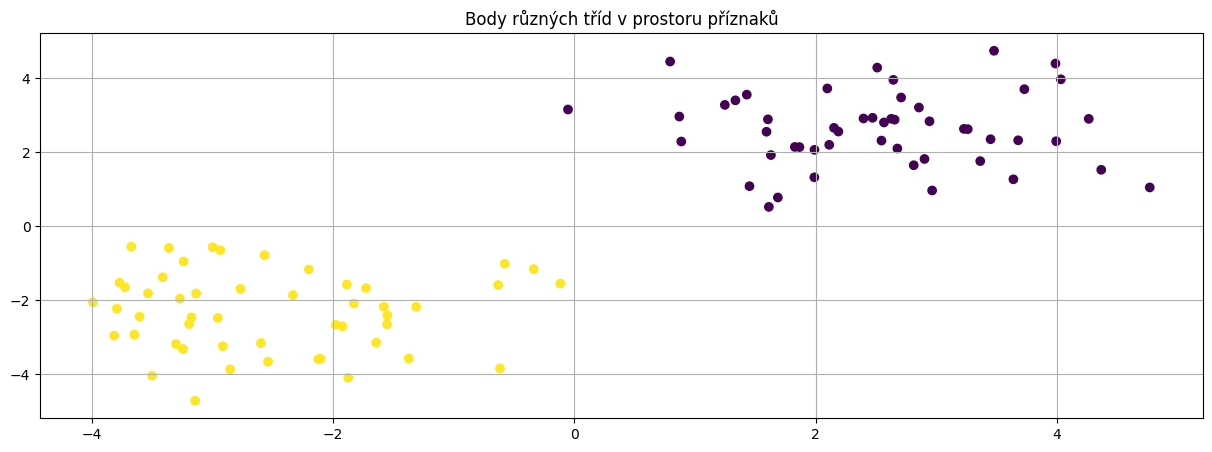

In [37]:
# generování bodů
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
dim = 2 # dimenze ulohy
samples = 100
X, y = make_blobs(n_samples=samples, n_features=dim, centers=[(2.5,2.5),(-2.5,-2.5)], random_state=0)
y[y==0] = -1 # udelej tridy -1/1
plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

In [38]:
import cvxopt
from cvxopt import matrix, solvers
import numpy as np
# zde je nutno rozumět CVXOPT - jedná se jen o vygenerování matic pro problém QP
def create_model_SVM_primary(X,y):
  n,dim=X.shape #zjisti si rozmery
  print(dim)
  # generovani matic a vektoru pro ucelovou funkci
  # generovani matice P - pro resic vstupuje jako matice prislusne kvadraticke formy
  P = np.identity(dim+1) # toto je tedy matice pro ucelovou funkci I
  P[dim,dim]=0 # eliminuj koeficient pro b
  # generovani vektoru q - vektor s koeficienty pro linearni cast ucelove funkce
  q = np.zeros(dim+1) # neni zde linearni clen v ucelove funkci, tedy 0
  # generovani omezujicich podminek
  h = -1*np.ones((n,1))
  G = np.ones((n, dim+1))
  for i,(x,y) in enumerate(zip(X,y)):
    G[i,:dim] = -y*x # sloupce odpovidajici w
    G[i,dim] = -y  # sloupec odpovidajici b
  return matrix(P), matrix(q), matrix(G), matrix(h)
# volani metody pro vygenerovani prislusnych matic
P, q, G, h = create_model_SVM_primary(X,y)
sol = solvers.qp(P, q, G, h) # zavolani resice
w = sol['x']
print(w)

2
     pcost       dcost       gap    pres   dres
 0:  3.4433e-02  1.9256e+01  3e+02  2e+00  5e+02
 1:  2.6100e-01 -2.7233e+01  4e+01  3e-01  8e+01
 2:  3.5849e-01 -1.3024e+00  2e+00  1e-02  4e+00
 3:  3.2889e-01  2.3703e-01  9e-02  1e-04  3e-02
 4:  3.0276e-01  2.9302e-01  1e-02  1e-05  3e-03
 5:  3.0168e-01  3.0153e-01  1e-04  1e-07  4e-05
 6:  3.0166e-01  3.0166e-01  1e-06  1e-09  4e-07
 7:  3.0166e-01  3.0166e-01  1e-08  1e-11  4e-09
Optimal solution found.
[-5.88e-01]
[-5.08e-01]
[ 2.11e-01]



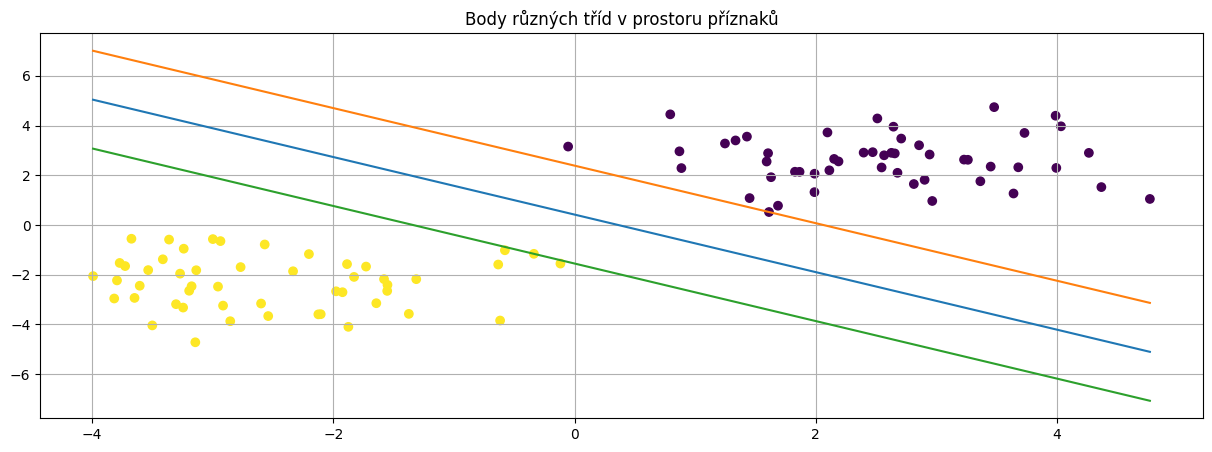

In [39]:
# vizualizace výsledků
left = np.min(X, axis = 0)
right = np.max(X, axis = 0)
xgr = np.linspace(left[0], right[0],100)
ygr = -(w[0]*xgr + w[2])/w[1]
ygr_p1 = -(w[0]*xgr + w[2]+1)/w[1]
ygr_m1 = -(w[0]*xgr + w[2]-1)/w[1]
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(xgr,ygr)
plt.plot(xgr,ygr_p1, label = "+1")
plt.plot(xgr,ygr_m1, label = "-1")
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

### Soft margin formulace

Výše uvedená formulace nepřipouští to, že nějaký bod nebude klasifikován správně. Základní myšlenka rozšíření je taková, že dovolíme bodům aby se nacházely pod danou hranicí, viz obrázek níže. Hodnotu o kterou se může *i-*tý bod nacházet pod příslušnou hranicí označíme $\xi_i$, kde $\xi_i \ge 0$.

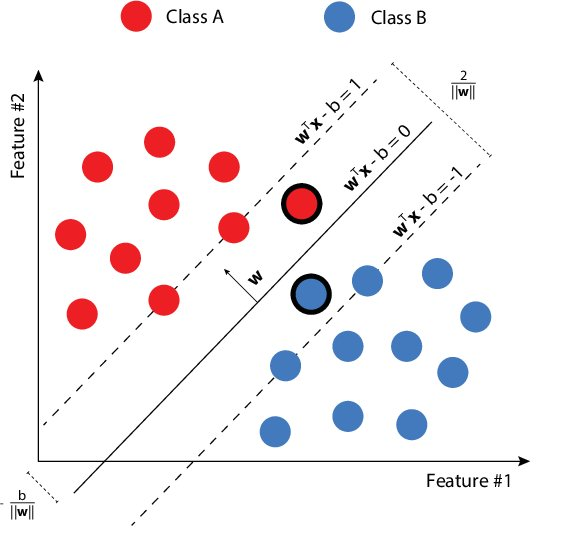

### Matematická formulace

Vyjdeme z výše uvedené myšlenky porušení podmínky, že bod je nad příslušnou hranicí. Nyní může být i pod okrajem s posunem $\xi_i$, což se projeví na omezujících podmínkách. Pro labely s hodnotou  $y_i=+1$ chceme, aby platilo $w^T⋅x_i+b≥+1-\xi_i$ a pro $y_i=−1$ platilo, že $w^T⋅x_i+b≤−1+\xi_i$. Toto lze opět zapsat ve tvaru $y_i(w^T\cdot x_i +b)-1+\xi_i\ge0$.

Samozřejmě chceme, aby dílčí chyby $\xi_i$, kterých se algoritmus dopustí, byly co nejmenší, z tohoto důvodu přidáme do kriteriální funkce penalizační člen a dostáváme:
\begin{align}
&\min \frac{||w||^2}{2} + c \sum_i \xi_i \\
\mbox{za podmínek}\\
&y_i(w^T\cdot x_i +b)-1+\xi_i\ge0,
\end{align}
kde neznámé jsou $w$, $b$ a $\xi_i$, $c$ je konstanta vlivu penalizace, tedy tzv. *hyperparametr* modelu. Opět je možné provést duální formulaci této úlohy, více viz [zde](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf).


### Jádrová transformace - kernelizace

Data v prostoru nižší dimenze nemusí být lineárně separovatelná, ale při vhodné nelineární transformaci $\phi$ do prostoru vyšší dimenze je lze oddělit, viz níže.

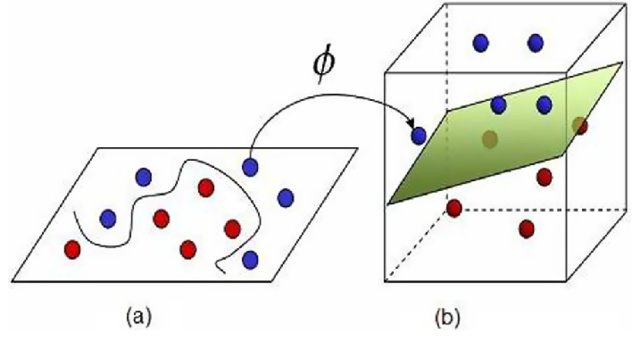

Transformace do prostoru vyšší dimenze se neprovádí explicitně, tedy tak, že bychom transformovali každý vzor zvlášť, a pak provedli SVM, ale používá se tzv. *jádrového triku*. Trik spočívá v tom, že
stačí pouze drobně upravit duální formulaci modelu SVM a máme v ní již obsaženou nelineární transformaci.

**Poznámka**
Pokud bychom transformovali body nejprve do prostoru vyšší dimenze a pak provedli SVM, tak by to bylo výpočetně náročnější.

Pro názornost uvažujme duální formulaci pro hard margin úlohu:

\begin{align}
&\max \sum_i\alpha_i- \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i  x_i \cdot x_j y_j \\
\mbox{za podmínek}\\
&\sum_i \alpha_iy_i=0\\
&\alpha_i\ge0.\\
\end{align}

A klasifikace je dána:
 \begin{equation}
\hat{y_j}=\text{sign}(\sum_i\alpha_i y_i x_i \cdot x_j + b).
\end{equation}

Všimněme si skalárního součinu $x_i \cdot x_j$ jak v účelové funkci, tak i ve vlastní klasifikaci. Pro transformaci do prostoru vyšší dimenze by se zde objevilo $\phi(x_i) \cdot \phi(x_j)$. Jádrový trik spočívá v nahrazení tohoto součinu pomocí tzv. *jádra* $k(x_i,x_j)$, s vlastností $k(x_i,x_j)=\phi(x_i) \cdot \phi(x_j)$. Nemusí se tak provádět přepočet do vyšší dimenze, pouze stačí upravit fomulaci na
\begin{align}
&\max \sum_i\alpha_i- \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i  k(x_i, x_j) y_j \\
\mbox{za podmínek}\\
&\sum_i \alpha_iy_i=0\\
&\alpha_i\ge0,\\
\end{align}
a pro klasifikaci:
 \begin{equation}
\hat{y_j}=\text{sign}(\sum_i\alpha_i y_i k(x_i, x_j) + b),
\end{equation}
což je efektivnější.

### Příklady jader

Konkrétní příklady jader:


*   *Lineární jádro*: $k(x_i, x_j) = x_i \cdot x_j$ - původní formulace
*   *Polynomiální jádro*: $k(x_i, x_j) = (x_i \cdot x_j +a)^b$
*   *RBF* (Radial Basis Function): $k(x_i, x_j) = e^{-\frac{(||x_i-x_j||^2)}{2\sigma^2}}$
*   *Jádro typu tanh*: $k(x_i, x_j) = \tanh(a x_i \cdot x_j +b)$

Přehled některých jader je podán [zde](http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#kernel_methods).





### SVM v knihovně SKLEARN

V knihovně [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) je metoda SVM implementována dvoukolejně. Existuje zde implementace [svc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), která umožňuje provádět jádrové transformace a pro případ klasifikace do více tříd implementuje metodu *one-to-one*, což ji činí výpočetně náročnou. Dle dokumentace je založená i na jiné optimalizační knihovně a tedy algoritmu pro řešení úloh kvadratického programování, konkrétně [SMO](https://en.wikipedia.org/wiki/Sequential_minimal_optimization). Druhá model [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) se odlišuje hlavně použitím pouze lineárního jádra, jinou optimalizační knihovnou a též i algoritmem pro klasifikaci do výše tříd *one-vs-rest*, což ji činí v dokumentaci doporučovanou pro velké datasety.

V této knihovně ja zároveň implementováno použití metody SVM pro regresi [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) a [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR). Rozdíly jsou podobné jako v případě klasifikace.

In [40]:
from sklearn.datasets import load_wine
# nacteni dat
data = load_wine()
X = pd.DataFrame(data.data, columns = data.feature_names) #nacti si data
y = data.target# nacti si labely

In [41]:
X

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
#použití svm + nastaveni hyperparametrů (mírně převzato z dokumentace)
from sklearn import svm
from sklearn.model_selection import GridSearchCV
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
parametry = {'kernel':("linear", "poly", "rbf"), 'C':[0.01,0.1, 1, 10]} #nastav si grid parametrů
model = svm.SVC()
gs = GridSearchCV(model, parametry, verbose=3)# vloz model do hledace
gs.fit(X_tr, y_tr)
print(f"Nejlepší parametry:{gs.best_params_}")
print(f"Score:{gs.score(X_tr,y_tr)} na trenovacích datech")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.897 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.897 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.893 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.821 total time=   0.0s
[CV 1/5] END ...............C=0.01, kernel=poly;, score=0.655 total time=   0.0s
[CV 2/5] END ...............C=0.01, kernel=poly;, score=0.517 total time=   0.0s
[CV 3/5] END ...............C=0.01, kernel=poly;, score=0.571 total time=   0.0s
[CV 4/5] END ...............C=0.01, kernel=poly;, score=0.679 total time=   0.0s
[CV 5/5] END ...............C=0.01, kernel=poly;, score=0.643 total time=   0.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.414 total time=   0.0s
[CV 2/5] END ................C=0.01, kernel=rbf;

#Pipelines a validace

Abychom se vyhnuli tomu, že náhodou budou trénovací data "dobrá" a testovací "špatná", nebo obráceně, používá se vícenásobná validace. Podrobnější popis je uveden [zde](https://scikit-learn.org/stable/modules/cross_validation.html#stratification). Jedná se vlastně o opakované vybírání testovacích a trénovacích dat z celku (tzv. *fold*), abychom zamezili tomu, že se nám podaří vybrat data, která vycházejí pro model příznivě, ale v praxi pak model bude selhávat. Příkladem je algoritmus *K-fold validation*.
Často je součástí i souhrné ověření úspěšnosti, tedy nikoliv jen porovnání na dílčí datové sadě, ale za všechny foldy dohromady. V knihovně *scikit-learn* jsou již některé takové [algoritmy](https://scikit-learn.org/stable/modules/cross_validation.html) naprogramovány.


Obvykle máme několik konkurenčních modelů, které se liší jak použítím transformace dat, volbou parametrů, nebo i daným algoritmem. Protože je potřebujeme navzájem srovnávat, a nechceme mít složitý kód, tak spolu svážeme jednotlivé dílčí činnosti pomocí [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) (rour).    Roury (pipeliny) slouží k tomu, abychom si mohli sestavit celý proces transformace dat a učení modelu do jednoho objektu, který nám poskytuje metody *fit()*, *predict()*, *score()* (score odpovídá skórovací funkci pro klasifikátor v dané rouře), apod. a zapouzdřuje transformace dat s učením zároveň.

Nyní si ukážeme mírně komplexnější úlohu. Data jsou již očištěná, tak nebudeme nic odstraňovat a ani vkládat.

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer # tri druhy skalovani
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # rozdeli  data
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score # pro automatizaci ohodnoceni
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore') # hazi to warning, ignorujme je

# parametry
seed = 42
# nacteni dat
data = load_wine()
X = pd.DataFrame(data.data, columns = data.feature_names) #nacti si data
y = data.target# nacti si labely
# vytvoreni pipes
pipe_sc_lr = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])
pipe_sc_knn = Pipeline([('scaler', StandardScaler()),('classifier', KNeighborsClassifier(n_neighbors=3))])
pipe_mm_lr = Pipeline([('scaler', MinMaxScaler()),('classifier', LogisticRegression())])
pipe_mm_knn = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=3))])
pipe_norm_lr = Pipeline([('scaler', Normalizer()),('classifier', LogisticRegression())])
pipe_norm_knn = Pipeline([('scaler', Normalizer()),('classifier', KNeighborsClassifier(n_neighbors=3))])
# udelej si seznam rour
pipes = {"pipe_sc_lr":pipe_sc_lr, "pipe_sc_knn":pipe_sc_knn,"pipe_mm_lr":pipe_mm_lr,"pipe_mm_knn":pipe_mm_knn,"pipe_norm_lr":pipe_norm_lr,"pipe_norm_knn":pipe_norm_knn}
results = {}
# rozdel si data
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=seed) # testovaci data zatim nepouzijeme
# automatizace vyhodnoceni
for k, pipe in pipes.items(): # pro kazdou pipe, delej
  results[k] = cross_val_score(pipe, X_tr, y_tr, cv=5) # pouzij 5 foldu

#udelej si dataframe pro zhodnoceni
results = pd.DataFrame(data = results)
print(results) # tiskni za jednotlive foldy uspesnost klasifikatoru
print(results.mean()) # tiskni prumer

   pipe_sc_lr  pipe_sc_knn  pipe_mm_lr  pipe_mm_knn  pipe_norm_lr  \
0    0.965517     0.931034    1.000000     1.000000      0.586207   
1    0.965517     0.965517    0.965517     0.965517      0.482759   
2    1.000000     0.964286    0.964286     0.964286      0.464286   
3    0.964286     0.964286    0.964286     0.928571      0.464286   
4    1.000000     0.928571    1.000000     0.928571      0.500000   

   pipe_norm_knn  
0       0.827586  
1       0.862069  
2       0.750000  
3       0.571429  
4       0.750000  
pipe_sc_lr       0.979064
pipe_sc_knn      0.950739
pipe_mm_lr       0.978818
pipe_mm_knn      0.957389
pipe_norm_lr     0.499507
pipe_norm_knn    0.752217
dtype: float64


# Literatura:
 0) Nenáročný úvod do problematiky strojového učení se zaměřením na klasifikaci je [zde](https://developers.google.com/machine-learning/crash-course/classification/video-lecture).

1) [Blog](https://sebastianraschka.com/blog/2021/ml-course.html) autora knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.

2)  Pro čtenáře s hlubším zájmem je k dispozici sbírka výukových materiálů ke knize [An Introduction to Statistical Learning](https://www.statlearning.com/) včetně
knihy samotné:

JAMES, Gareth, Daniela WITTEN, Trevor HASTIE a Robert TIBSHIRANI. An introduction to statistical learning: with applications in R. New York: Springer, [2013]. Springer texts in statistics, 103. ISBN 978-1461471370.

3)  Použití knihovny [Pandas](https://pandas.pydata.org/docs/user_guide/scale.html).
